  tipos_sujetos generos     condicion             region neurotransmisor  \
0           S01       M  experimental  cortex prefrontal      serotonina   
1           S01       F  experimental  cortex prefrontal        dopamina   
2           S01       M  experimental  cortex prefrontal        dopamina   
3           S02       M  experimental  cortex prefrontal        dopamina   
4           S02       M  experimental  cortex prefrontal        dopamina   

   precisión  
0   0.805850  
1   0.950385  
2   0.952103  
3   0.986858  
4   0.706211  


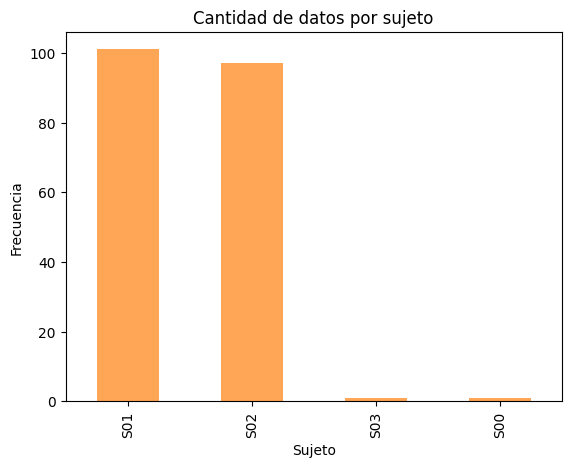

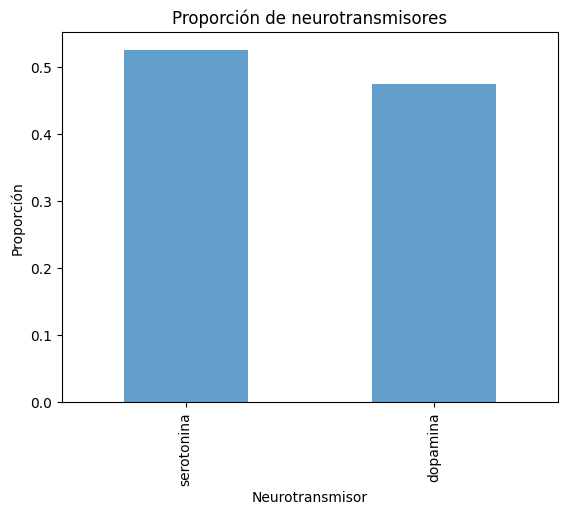

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Número de muestras
n = 200

# Listas de categorías
tipos_sujetos = ['S' + str(i).zfill(2) for i in range(4)]   # S00, S01, S02, S03
generos = ['M', 'F']
condicion = ['control', 'experimental']
region = ['hipocampo', 'cortex prefrontal', 'amigdala']
neurotransmisores = ['dopamina', 'serotonina']

# Función para muestreo "normal" sobre categorías
def sample_normal_categorical(categories, size):
    x = np.linspace(-3, 3, len(categories))
    probs = np.exp(-x**2 / 2)   # distribución normal discreta
    probs /= probs.sum()
    return np.random.choice(categories, size=size, p=probs)

# Crear DataFrame
df = pd.DataFrame({
    'tipos_sujetos': sample_normal_categorical(tipos_sujetos, n),
    'generos': sample_normal_categorical(generos, n),
    'condicion': sample_normal_categorical(condicion, n),
    'region': sample_normal_categorical(region, n),
    'neurotransmisor': sample_normal_categorical(neurotransmisores, n),
    'precisión': np.random.normal(loc=0.92, scale=0.08, size=n)
})

# Mostrar primeras filas
print(df.head())

# ==========================
# GRAFICAR
# ==========================

# Histograma de cantidad de datos por sujeto
df['tipos_sujetos'].value_counts().plot(kind='bar', color='tab:orange', alpha=0.7)
plt.title("Cantidad de datos por sujeto")
plt.xlabel("Sujeto")
plt.ylabel("Frecuencia")
plt.show()

# Histograma de proporción de neurotransmisores
df['neurotransmisor'].value_counts(normalize=True).plot(kind='bar', color='tab:blue', alpha=0.7)
plt.title("Proporción de neurotransmisores")
plt.xlabel("Neurotransmisor")
plt.ylabel("Proporción")
plt.show()


In [29]:
# para cada sujeto, sacar la proporción del tipo de condición 
#para cada suejto, calcular el maximo , el minimo y la media de su presición 
# para condición , hacer el histograma de las regiones activadas 

# hacerlo mediante 2 metodos: filtrado de dataframes y usando groupby


Sujeto S01 - Proporciones de condición:
condicion
experimental    0.544554
control         0.455446
Name: proportion, dtype: float64

Sujeto S02 - Proporciones de condición:
condicion
experimental    0.536082
control         0.463918
Name: proportion, dtype: float64

Sujeto S03 - Proporciones de condición:
condicion
control    1.0
Name: proportion, dtype: float64

Sujeto S00 - Proporciones de condición:
condicion
control    1.0
Name: proportion, dtype: float64

Sujeto S01 - Máx: 1.088, Mín: 0.725, Media: 0.921

Sujeto S02 - Máx: 1.074, Mín: 0.706, Media: 0.922

Sujeto S03 - Máx: 0.935, Mín: 0.935, Media: 0.935

Sujeto S00 - Máx: 0.931, Mín: 0.931, Media: 0.931


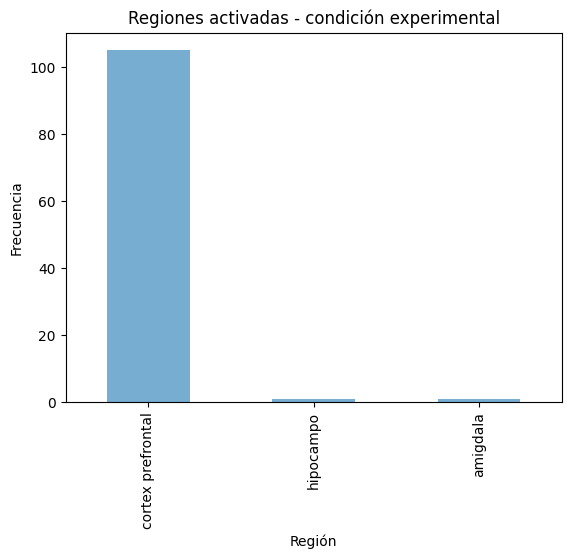

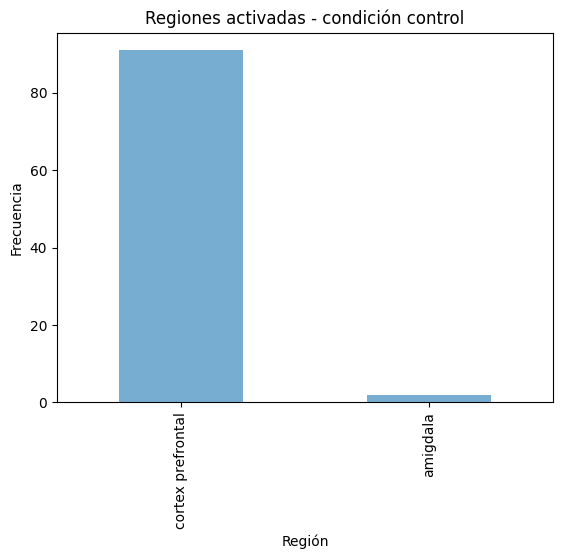


Proporción de condición por sujeto (groupby):
 condicion       control  experimental
tipos_sujetos                        
S00            1.000000           NaN
S01            0.455446      0.544554
S02            0.463918      0.536082
S03            1.000000           NaN

Estadísticos de precisión por sujeto (groupby):
                     max       min      mean
tipos_sujetos                              
S00            0.930532  0.930532  0.930532
S01            1.088145  0.724816  0.920819
S02            1.073590  0.706211  0.922330
S03            0.935026  0.935026  0.935026


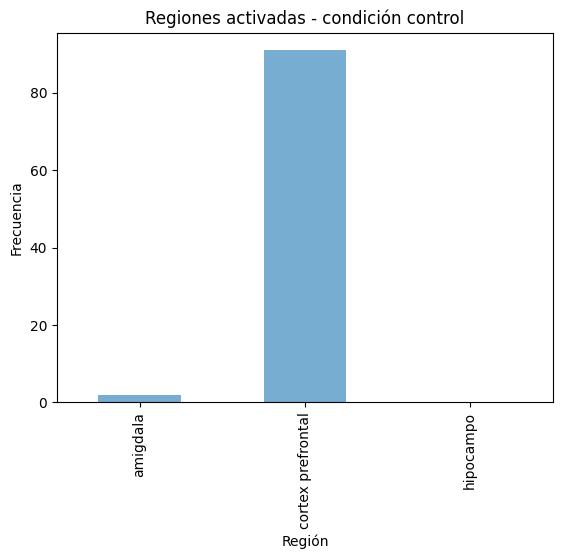

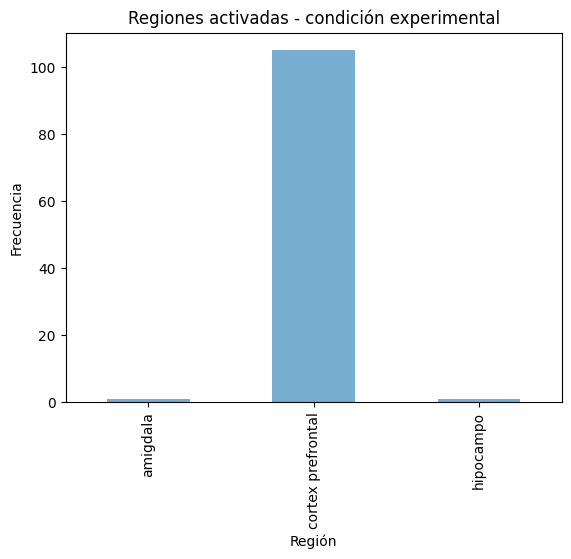

In [30]:
import matplotlib.pyplot as plt

# ===============================
# MÉTODO 1: FILTRADO (con máscaras)
# ===============================

# --- Proporción de tipo de condición por sujeto ---
for sujeto in df['tipos_sujetos'].unique():
    sub_df = df[df['tipos_sujetos'] == sujeto]
    proporciones = sub_df['condicion'].value_counts(normalize=True)
    print(f"\nSujeto {sujeto} - Proporciones de condición:\n{proporciones}")

# --- Máximo, mínimo y media de precisión por sujeto ---
for sujeto in df['tipos_sujetos'].unique():
    sub_df = df[df['tipos_sujetos'] == sujeto]
    max_prec = sub_df['precisión'].max()
    min_prec = sub_df['precisión'].min()
    mean_prec = sub_df['precisión'].mean()
    print(f"\nSujeto {sujeto} - Máx: {max_prec:.3f}, Mín: {min_prec:.3f}, Media: {mean_prec:.3f}")

# --- Histograma de regiones por condición ---
for cond in df['condicion'].unique():
    sub_df = df[df['condicion'] == cond]
    sub_df['region'].value_counts().plot(kind='bar', alpha=0.6)
    plt.title(f"Regiones activadas - condición {cond}")
    plt.xlabel("Región")
    plt.ylabel("Frecuencia")
    plt.show()


# ===============================
# MÉTODO 2: GROUPBY
# ===============================

# --- Proporción de tipo de condición por sujeto ---
proporciones_group = df.groupby('tipos_sujetos')['condicion'].value_counts(normalize=True).unstack()
print("\nProporción de condición por sujeto (groupby):\n", proporciones_group)

# --- Máximo, mínimo y media de precisión por sujeto ---
stats_group = df.groupby('tipos_sujetos')['precisión'].agg(['max', 'min', 'mean'])
print("\nEstadísticos de precisión por sujeto (groupby):\n", stats_group)

# --- Histograma de regiones por condición ---
region_group = df.groupby('condicion')['region'].value_counts().unstack(fill_value=0)

# Graficar cada condición
for cond in region_group.index:
    region_group.loc[cond].plot(kind='bar', alpha=0.6)
    plt.title(f"Regiones activadas - condición {cond}")
    plt.xlabel("Región")
    plt.ylabel("Frecuencia")
    plt.show()


In [ ]:
# esto en realidad es la tarea y clase de ayer pero la ultra regue ayer 